In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sb
import datetime as dt


#import mpld3
#mpld3.enable_notebook()

In [23]:
filepath ='/Users/jonathansaragosti/Documents/Open Data/NYPD_Motor_Vehicle_Collisions.csv'

Names = ['DATE', 'TIME', 'BOROUGH', 'ZIP_CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION',
         'ON_STREET_NAME', 'CROSS_STREET_NAME', 'OFF_STREET_NAME', 'NUMBER_OF_PERSONS_INJURED',
         'NUMBER_OF_PERSONS_KILLED', 'NUMBER_OF_PEDESTRIANS_INJURED', 'NUMBER_OF_PEDESTRIANS_KILLED',
         'NUMBER_OF_CYCLIST_INJURED', 'NUMBER_OF_CYCLIST_KILLED', 'NUMBER_OF_MOTORIST_INJURED',
         'NUMBER_OF_MOTORIST_KILLED', 'CONTRIBUTING_FACTOR_VEHICLE_1', 'CONTRIBUTING_FACTOR_VEHICLE_2',
         'CONTRIBUTING_FACTOR_VEHICLE_3', 'CONTRIBUTING_FACTOR_VEHICLE_4', 'CONTRIBUTING_FACTOR_VEHICLE_5',
         'UNIQUE_KEY','VEHICLE_TYPE_CODE_1', 'VEHICLE_TYPE_CODE_2', 'VEHICLE_TYPE_CODE_3', 'VEHICLE_TYPE_CODE_4',
         'VEHICLE_TYPE_CODE_5']


DATASET = pd.read_csv(filepath, skipinitialspace=True)

In [6]:
nplt = 10000

In [4]:
dead = DATASET.NUMBER_OF_PERSONS_KILLED.nonzero()
Dead = dead[0]
Dead.size

973

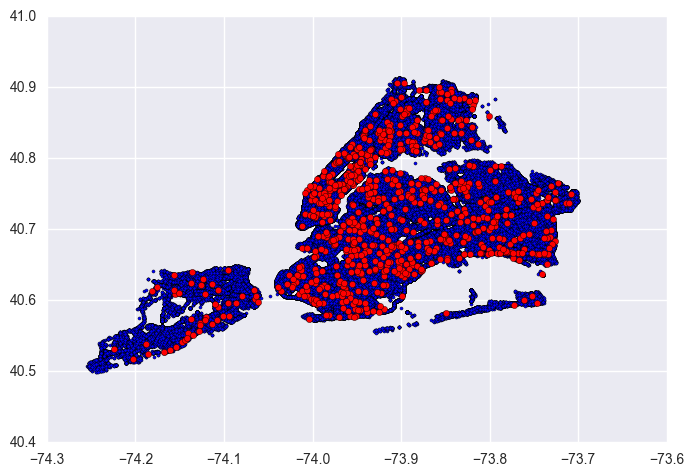

In [8]:
plt.scatter(DATASET.LONGITUDE,DATASET.LATITUDE, marker='.')
plt.scatter(DATASET.LONGITUDE[Dead],DATASET.LATITUDE[Dead],c='red',marker='o')
#plt.xlim(-74.1,-73.9)
#plt.ylim(40.6,40.8)
plt.show()

In [12]:
print('data set starts on: ' + DATASET.DATE.min() + ' and ends on : ' + DATASET.DATE.max())

data set starts on: 01/01/2013 and ends on : 12/31/2015


In [17]:
print('total number of collisions: ' + str(DATASET.DATE.count()))

total number of collisions: 816610


In [18]:
print('number of collisions per day: ' + str(DATASET.DATE.count()/(3*365)))

number of collisions per day: 745.762557078


In [26]:
print(str(np.sum(DATASET.NUMBER_OF_PERSONS_KILLED))+' people killed over 3 years')
print('among which: '+ str(np.sum(DATASET.NUMBER_OF_MOTORIST_KILLED))+ ' were in a motorized vehicle') 
print('             '+ str(np.sum(DATASET.NUMBER_OF_PEDESTRIANS_KILLED))+ ' were pedestrians') 
print('             '+ str(np.sum(DATASET.NUMBER_OF_CYCLIST_KILLED))+ ' were cyclists')

1012 people killed over 3 years
among which: 397 were in a motorized vehicle
             555 were pedestrians
             60 were cyclists


In [140]:
for count in 0:int(DATASET.TIME.size):
    print(count)
    #thistime = DATASET.TIME[count]
    #timearray[count] = float(thistime[0:2])+float(thistime[3:])/60

SyntaxError: invalid syntax (<ipython-input-140-d17c6e1833ad>, line 1)

In [65]:
timearray = np.zeros(DATASET.TIME.count())
count = -1
for thistime in DATASET.TIME:
    count = count+1
    thattime = thistime.split(":")
#print(thattime)
# #print(float(thattime[0])+float(thattime[1])/60)
    timearray[count] = float(thattime[0])+float(thattime[1])/60
    
print('timearray done')

timearray done


In [162]:
# create datetime objects from fields DATE and TIME:

DATASET.fdt = np.zeros(DATASET.TIME.count())

count = -1
for thisdate in DATASET.TIME:
    count += 1
    thisfulldate = DATASET.DATE[count] + ' ' + thistime
    DATASET.fdt[count] = dt.datetime.strptime(thisfulldate, '%m/%d/%Y %H:%M')

TypeError: float() argument must be a string or a number, not 'datetime.datetime'

In [107]:
# to make sure the kernel-density estimate behaves on the edges of the data set,
# we artificially make the data periodical:
dt = np.ones(np.size(timearray))*24
Timearray = np.concatenate([timearray, timearray-dt])
Timearray = np.concatenate([Timearray, timearray+dt])

In [106]:
sb.distplot(Timearray, bins=120)
plt.show()

plt.xlim(0, 24)
plt.xticks(np.arange(25))
print("done")

In [161]:
print(DATASET.DATE[0:10] + DATASET.TIME[0:10])

0     04/26/20160:22
1     04/26/20160:30
2    04/26/201610:00
3    04/13/201617:15
4    04/13/201617:15
5    04/13/201617:15
6    01/06/201618:00
7    01/06/201618:10
8    01/06/201618:10
9    01/06/201618:25
dtype: object
